In [1]:
import helper_functions as H
import xml.etree.ElementTree as ET
import pprint as pp
import tkinter

In [2]:
xmlfile = "Interfaces.xml"

In [3]:
# create element tree object 
tree = ET.parse(xmlfile) 

# get root element 
root = tree.getroot() 

# create empty list for news items 
signals = {}

# iterate news items 
for item in root.findall('./InputSignals/Signal'): 
    
#     print(item.attrib['Name'])
    signals[item.attrib['Name']] = [item.attrib['BaseType'], '']
    
pp.pprint(signals)

ParseError: not well-formed (invalid token): line 6, column 68 (<string>)

In [ ]:
signals = {'olp crane function 1b': 'itf_In_AOR_str_aorIn_OLP_craneFunction_craneFunction_firstBoom',
 'olp dump1 request': 'itf_In_AOR_str_aorIn_OLP_ctrlDump_val',
 'olp dump1 spool pos 1b lim': 'itf_In_AOR_str_aorIn_OLP_DumpSpoolPos1BLim_val',
 'olp state 1b': 'itf_In_AOR_str_aorIn_OLP_olpState1B_val',
 'rclh crane function 1b': 'itf_In_AOR_str_aorIn_RCLH_craneFunction_craneFunction_firstBoom',
 'rel spool pos 1b': 'itf_In_AOR_str_aorIn_LPLC_actualCap1B_val',
 'remote control mode': 'itf_In_AOR_str_aorIn_RCUI_rcMode_rcMode_rcMode',
 'sensor variant 1b angle': 'itf_In_AOR_str_aorIn_ANG_variant_angVariants_variant1B',
 'stationary mode': 'itf_In_AOR_str_aorIn_SMOD_stationaryMode_val'}


In [4]:
# def parse_testSpec(filename):

filename = 'SLS component Test Specification.md'

with open(filename, 'r') as reader:
    print(f'file {filename} opened')
    testFound = -1
    data = reader.readlines()
    TC_list = []
    for line in data:
        print(line)
        isFound = H.isHeaderType(0, line)
        if isFound:
            testFound = testFound + 1
            TC_list.append([line])
        else:
            if testFound > -1:
                TC_list[testFound].append(line)

file SLS component Test Specification.md opened
# SLSL Test Specification



> Author: Monika Nowak  

Version 3.0



## Revision history  

|Version| Date modified | Modified by | Description |

|---|---|---|---|

| 1.0 | 17.01.2020 | Monika Nowak | Initial version |

| 2.0 | 26.05.2020 | Monika Nowak | update according  Sw req. v.5|

| 2.1 | 08.04.2021 | Monika Nowak | updates to Sw req v6|

| 2.2 | 09.04.2021 | Monika Nowak | updates for summaries and SLS_026 and SLS_027|

| 3.0 | 16.04.2021 | Monika Nowak | updates after Adrian Voicu review, added cases 29-36 |



## Input documents

Reference no.| Document | Version

| --- | --- | --- |

1 | [SLSL SW Requirements ](https://drive.google.com/file/d/1jYM6ECa96kwv7D1XfQ056nJKmGxhlEQw/view?usp=sharing)| v.6 |

2 | [Component test plan](https://docs.google.com/document/d/1yTZwHCIcgnv8h_MxS-cvZbpVQ2c_PMn_W33ZbvoKU_Q) | v 0.5 |

2 | [SLSL  states calculation for TPT](https://docs.google.com/spreadsheets/d/1RpfYwuEKZPEeMeXgDCMn-hKsBaeEdxlS

In [6]:
TC_list[35]

['>### **SLS_036_No_Leg_status**\n',
 '[back to top](#test-cases)\n',
 '\n',
 '| Test case ID | SLS_036 |\n',
 '| --- | --- |\n',
 '| Summary | Test case checks leg state conditions for `AuxRight` stabiliser (u8). It checks if naither of statuses is active  Test uses pressure  and diameter values defined  in `Set 6` (see InputSet Table). | \n',
 '|Requirements | [1]: 62.3, 70.4, 78.4 |\n',
 '\n',
 '|No. | *Test step / Action* | *Expected result* | \n',
 '| --- | --- | --- |\n',
 '| |**Pre-condition** | |\n',
 '| 1. | Set signal value of `Remote Control Mode` to 3 | - |\n',
 '| 2. | Set signal value of `skipLegs` to 0 | - |\n',
 '| 3. | Set signal value of `auxStabLegLowP` to 1| -|\n',
 '| 4. | Set signal value of `auxStabLegLHighP` to 60| -|\n',
 '| 5. | Set signal value of `auxLegLoadPressureTh` to 8| -|\n',
 '| 6. | Set signal value of `pistDiaAuxRightStabLeg` to 0.09 | - |\n',
 '| 7. | Set signal value of `rodDiaAuxRightStabLeg` to 0.07 | - |\n',
 '| 8. | Set signal value of `hasAux

In [7]:
missingSignals = []
signals = []

In [8]:
for TC in TC_list:
    
    # Initialize flags
    test_precondFound = False
    test_descrFound = False
    test_bodyObj_pre = None
    test_bodyObj_descr = None

    
    # Extract the name of the testcase from the first line
    test_name = TC[0][8:-3]
    
    test_obj = H.init_Test(test_name)
    
    # Loop through all the lines in the testcase
    for line in TC:

        print(line)
        
        if line == '\n':
            continue

        # Check if Preconditions part is found 
        if H.isHeaderType(1, line):
            
            # Set flags
            test_precondFound = True
            
            continue
            
        # Check if Test Description part is found 
        if H.isHeaderType(2, line):
            
            # Set flags
            test_descrFound = True
            test_precondFound = False
                    
            continue

        if test_descrFound:
            
            # add a step of type 1 (test step) in the C body
            H.addTPTStep(1, test_obj, line, signals, missingSignals)
            
            continue            
            
        if test_precondFound:
            
            # add a step of type 0 (precondition) in the C body
            H.addTPTStep(0, test_obj, line, signals, missingSignals)
            
            continue
                        
    H.write_TCtoFile(test_name, test_obj)
    
#     break


>### **SLS_001_Force_calculation_all_legs**

[back to top](#test-cases)



| Test case ID | SLS_001  |

| --- | --- |

| Summary | Test checks force calculation for every leg (8 legs). Test uses random pressure value from entire range pressure. |

Requirements | [1]:  48.2, 49.2, 50.2, 51.2, 52.2, 53.2, 54.3, 55.3 |



|No. | *Test step / Action* | *Expected result* |

| --- | --- | --- |

| |**Pre-condition** | |  

| 1. | Set signal value of `skipLegs` to 0 | - |



TypeError: addTPTStep() takes 4 positional arguments but 5 were given

In [ ]:
pp.pprint(test_obj)

In [ ]:
import pprint as pp
pp.pprint(missingSignals)
pp.pprint(signals)

In [ ]:
signals={'itf_In_AOR_str_aorIn_ANG_variant_angVariants_variant1B': 'sensor variant 1b angle',
 'itf_In_AOR_str_aorIn_ANG_variant_angVariants_variant2B': '',
 'itf_In_AOR_str_aorIn_ANG_variant_angVariants_variant3B': '',
 'itf_In_AOR_str_aorIn_ANG_variant_angVariants_variant4B': '',
 'itf_In_AOR_str_aorIn_ANG_variant_angVariants_variantCol': '',
 'itf_In_AOR_str_aorIn_ANG_variant_status': '',
 'itf_In_AOR_str_aorIn_APPEH_errorStates_errorStates_angleErrorState': '',
 'itf_In_AOR_str_aorIn_APPEH_errorStates_errorStates_errorAckState': '',
 'itf_In_AOR_str_aorIn_APPEH_errorStates_errorStates_lenErrorState': '',
 'itf_In_AOR_str_aorIn_APPEH_errorStates_errorStates_pressBoomErrorState': '',
 'itf_In_AOR_str_aorIn_APPEH_errorStates_errorStates_pressStabErrorState': '',
 'itf_In_AOR_str_aorIn_APPEH_errorStates_status': '',
 'itf_In_AOR_str_aorIn_LPLC_actualCap1B_status': '',
 'itf_In_AOR_str_aorIn_LPLC_actualCap1B_val': 'rel spool pos 1b',
 'itf_In_AOR_str_aorIn_OLP_DumpSpoolPos1BLim_status': '',
 'itf_In_AOR_str_aorIn_OLP_DumpSpoolPos1BLim_val': 'olp dump1 spool pos 1b lim',
 'itf_In_AOR_str_aorIn_OLP_craneFunction_craneFunction_column': '',
 'itf_In_AOR_str_aorIn_OLP_craneFunction_craneFunction_firstBoom': 'olp crane function 1b',
 'itf_In_AOR_str_aorIn_OLP_craneFunction_craneFunction_firstBoomExt': '',
 'itf_In_AOR_str_aorIn_OLP_craneFunction_craneFunction_fourthBoom': '',
 'itf_In_AOR_str_aorIn_OLP_craneFunction_craneFunction_fourthBoomExt': '',
 'itf_In_AOR_str_aorIn_OLP_craneFunction_craneFunction_hoist': '',
 'itf_In_AOR_str_aorIn_OLP_craneFunction_craneFunction_secondBoom': '',
 'itf_In_AOR_str_aorIn_OLP_craneFunction_craneFunction_secondBoomExt': '',
 'itf_In_AOR_str_aorIn_OLP_craneFunction_craneFunction_slew': '',
 'itf_In_AOR_str_aorIn_OLP_craneFunction_craneFunction_thirdBoom': '',
 'itf_In_AOR_str_aorIn_OLP_craneFunction_craneFunction_thirdBoomExt': '',
 'itf_In_AOR_str_aorIn_OLP_craneFunction_craneFunction_tool1': '',
 'itf_In_AOR_str_aorIn_OLP_craneFunction_craneFunction_tool2': '',
 'itf_In_AOR_str_aorIn_OLP_craneFunction_craneFunction_tool3': '',
 'itf_In_AOR_str_aorIn_OLP_craneFunction_craneFunction_tool4': '',
 'itf_In_AOR_str_aorIn_OLP_craneFunction_status': '',
 'itf_In_AOR_str_aorIn_OLP_ctrlDump_status': '',
 'itf_In_AOR_str_aorIn_OLP_ctrlDump_val': 'olp dump1 request',
 'itf_In_AOR_str_aorIn_OLP_olpState1B_status': '',
 'itf_In_AOR_str_aorIn_OLP_olpState1B_val': 'olp state 1b',
 'itf_In_AOR_str_aorIn_RCLH_craneFunction_craneFunction_column': '',
 'itf_In_AOR_str_aorIn_RCLH_craneFunction_craneFunction_firstBoom': 'rclh crane function 1b',
 'itf_In_AOR_str_aorIn_RCLH_craneFunction_craneFunction_firstBoomExt': '',
 'itf_In_AOR_str_aorIn_RCLH_craneFunction_craneFunction_fourthBoom': '',
 'itf_In_AOR_str_aorIn_RCLH_craneFunction_craneFunction_fourthBoomExt': '',
 'itf_In_AOR_str_aorIn_RCLH_craneFunction_craneFunction_hoist': '',
 'itf_In_AOR_str_aorIn_RCLH_craneFunction_craneFunction_secondBoom': '',
 'itf_In_AOR_str_aorIn_RCLH_craneFunction_craneFunction_secondBoomExt': '',
 'itf_In_AOR_str_aorIn_RCLH_craneFunction_craneFunction_slew': '',
 'itf_In_AOR_str_aorIn_RCLH_craneFunction_craneFunction_thirdBoom': '',
 'itf_In_AOR_str_aorIn_RCLH_craneFunction_craneFunction_thirdBoomExt': '',
 'itf_In_AOR_str_aorIn_RCLH_craneFunction_craneFunction_tool1': '',
 'itf_In_AOR_str_aorIn_RCLH_craneFunction_craneFunction_tool2': '',
 'itf_In_AOR_str_aorIn_RCLH_craneFunction_craneFunction_tool3': '',
 'itf_In_AOR_str_aorIn_RCLH_craneFunction_craneFunction_tool4': '',
 'itf_In_AOR_str_aorIn_RCLH_craneFunction_status': '',
 'itf_In_AOR_str_aorIn_RCUI_rcMode_rcMode_menu': '',
 'itf_In_AOR_str_aorIn_RCUI_rcMode_rcMode_rcMode': 'remote control mode',
 'itf_In_AOR_str_aorIn_RCUI_rcMode_status': '',
 'itf_In_AOR_str_aorIn_RSP_spoolPos1B_status': '',
 'itf_In_AOR_str_aorIn_RSP_spoolPos1B_val': '',
 'itf_In_AOR_str_aorIn_SMOD_stationaryMode_status': '',
 'itf_In_AOR_str_aorIn_SMOD_stationaryMode_val': 'stationary mode'}

In [ ]:
new_signals = dict([(value,key) for (key,value) in signals.items()])

In [ ]:
pp.pprint(new_signals)

In [ ]:
stra = "| 4. | Check signal value of `SSV Dump1 Control Request` | Signal value of `SSV Dump1 Control Request`= 0 "
spliff=stra.split("|")
newstr = ''.join((ch if ch in '0123456789.-' else ' ') for ch in spliff[3])
newstr.split()

In [ ]:
listOfNumbers = []

for i in newstr.split():

    # The try/except is necessary to filter out cases like | - |
    try:
        listOfNumbers.append(float(i))
    except:
        continue

print(listOfNumbers)

In [ ]:
test_obj = ['Set1', 'Set2', 'Set3', '//Comment1', 'Set4', 'Set5', 'Wait1', 'Compare1', 'Compare2', 'Set6', 'Set7', 'Wait2', 'Compare3', 'Compare4', 'Wait3', 'Compare5', 'Compare6']
expected_test_obj = ['Set1', 'Set2', 'Set3', '//Comment1', 'Set4', 'Set5', 'Compare1', 'Compare2', 'Wait1', 'Set6', 'Set7', 'Compare3', 'Compare4', 'Wait2']

In [ ]:
#     for i, step in enumerate(test_obj):
i = 0 

while i < len(test_obj):
    
#     print(f"i={i}")
    
    if 'Wait' in test_obj[i]:

#         print(f"found {test_obj[i]} at pos {i}")

        slice_test_obj=test_obj[i+1:]

#         print(f"slice_test_obj={slice_test_obj}")

        # Find the last 'Check' from the next chunck of 'Checks'
        j = 1
        
        while j < len(slice_test_obj):
            
#             print(f"i={i}")
#             print(f"j={j}")
#             print(f"{slice_test_obj[j]} at pos {i+j}")
            
            if 'Compare' in slice_test_obj[j]:
                j += 1
                continue
            else:
                break

#         print(f"insert at pos {i+j}, from pos {i}")

        # Insert step at position i+j and remove it from position i
        test_obj.insert(i+j, test_obj.pop(i))
        
#         print(f"new list={test_obj}")

        # continue search from position i+j
        i = i+j+1
    
    else:
        i += 1


## Tool for VSL polygons calculations and visualization

* to execute, update the variable "projected_point_index"
* three methods for calculation of the projection are available (the one used is Method 2)
* TODO: cleanup points definition for convex(initial) polygon

<IPython.core.display.Javascript object>


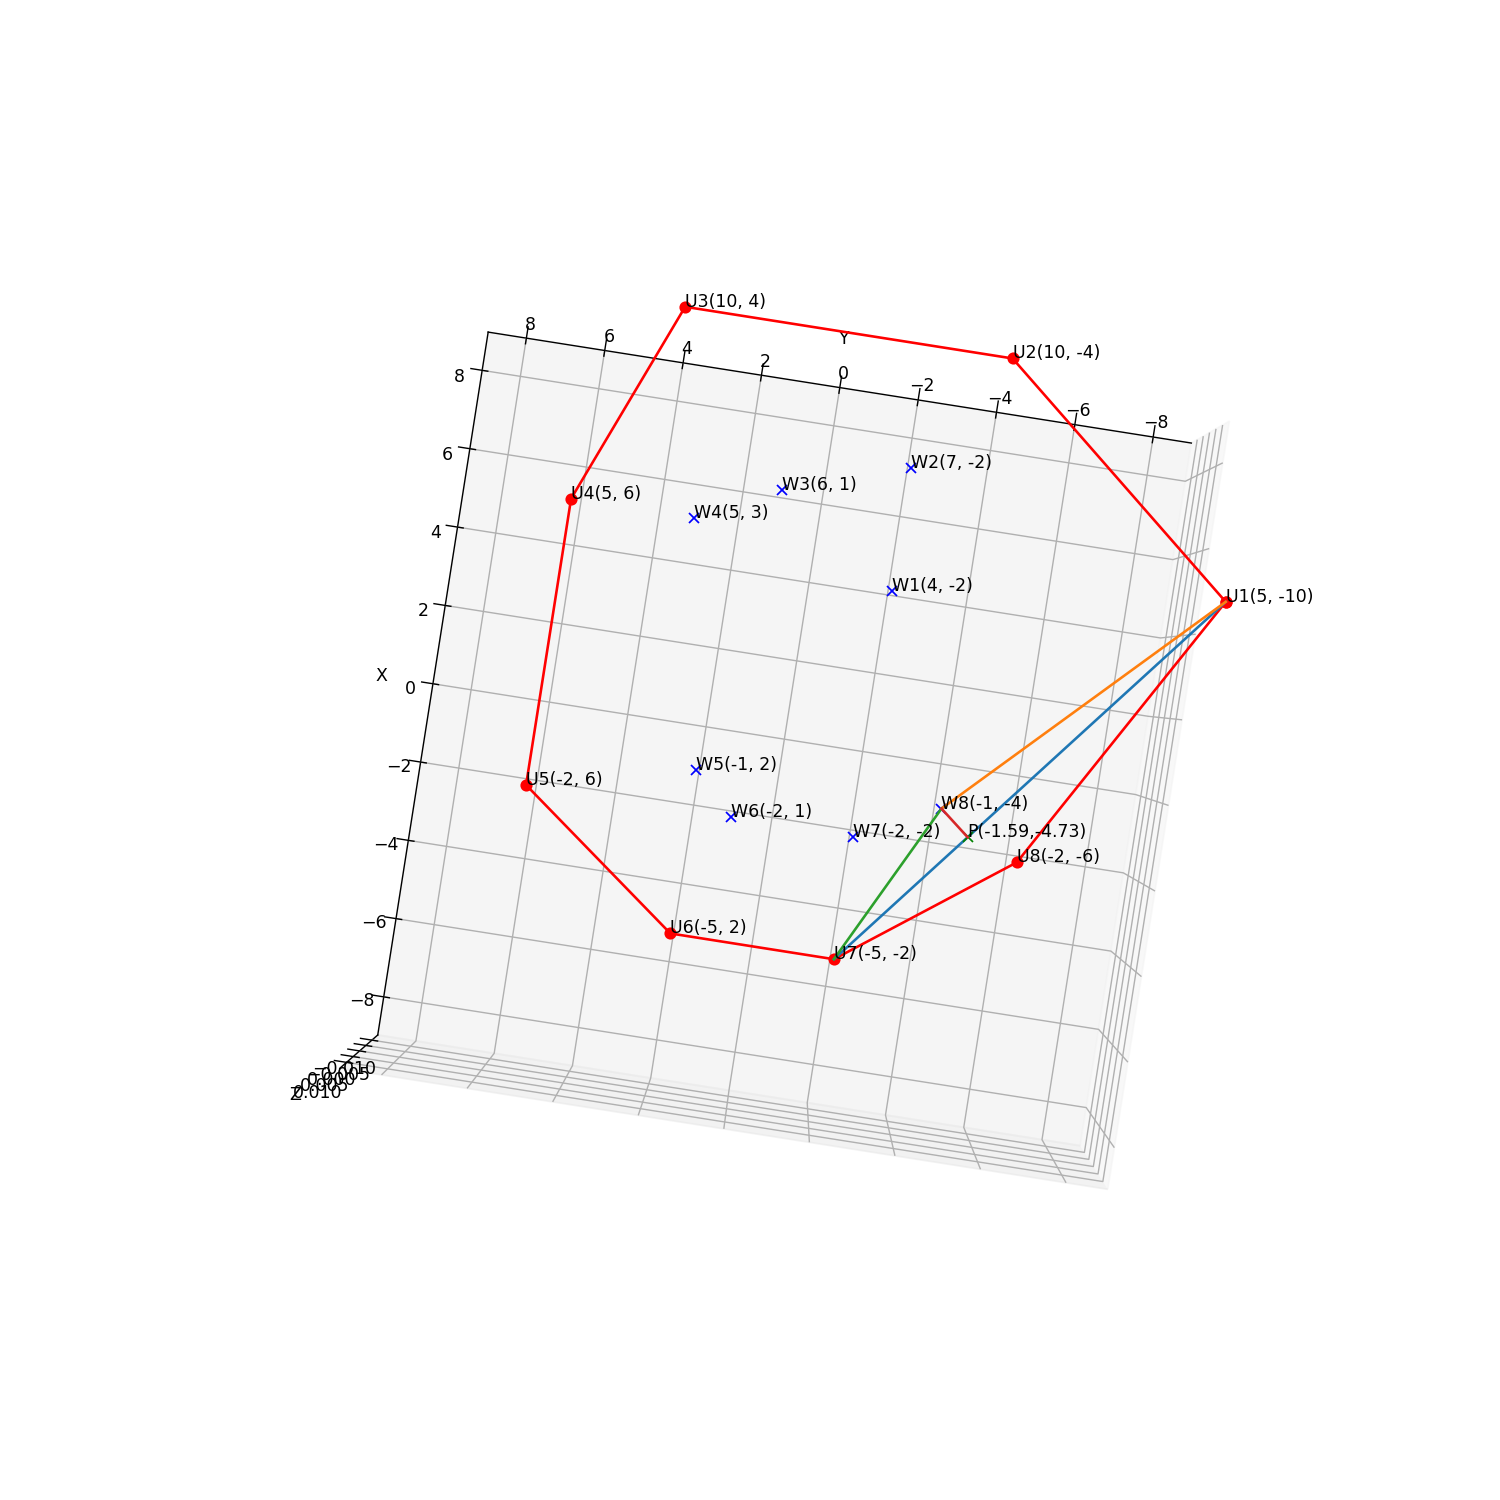

In [5]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from shapely.geometry import Polygon
import mpl_toolkits
import matplotlib

%matplotlib notebook

poly2 = Polygon([
( 5,-10),  # u1
( 10,-4),  # u2
( 10, 4),  # u3
( 5, 6),   # u4
(-2, 6),   # u5
(-5, 2),   # u6
(-5,-2),   # u7
(-2,-6),   # u8
])

x_pol,y_pol = poly2.exterior.xy
z =[0 for elem in x_pol]

x_concave = [
     4,  # w1
     7,  # w2
     6,  # w3
     5,  # w4
    -1,  # w5
    -2,  # w6
    -2,  # w7
    -1   # w8
]

y_concave = [
    -2,  # w1
    -2,  # w2
    1,   # w3
    3,   # w4
    2,   # w5
    1,   # w6
   -2,   # w7
   -4    # w8
]

z_concave = [0] * len(x_concave)



ax = plt.figure(figsize=(12,12)).add_subplot( projection='3d')

# Plot convex points
ax.plot(y_pol, x_pol, z, c='r', marker='o')

# Plot concave points
for (x_c, y_c) in zip(x_concave, y_concave):
    ax.plot(y_c, x_c, 0, c='b', marker='x')

# Add convex points labels
for index,(x, y, zs) in enumerate(zip(y_pol, x_pol, z)):
    if index == 8:
        break
    label = f'U{index+1}({int(y)}, {int(x)})'
    ax.text(x, y, zs, label, None)

#  Add concave points labels
for index,(x, y, zs) in enumerate(zip(y_concave, x_concave, z_concave)):
    label = f'W{index+1}({int(y)}, {int(x)})'
    ax.text(x, y, zs, label, None)


# Consider the three points A, B, C
# We need projection P of point B on the vector AC

# Select the index of the point to project (eg. 1-8, matching points U1-U8)
projected_point_index = 8

# Offset by 1, because of array indexing
x_A = x_pol[projected_point_index-2]
y_A = y_pol[projected_point_index-2]

# Offset by 1, because of array indexing
x_B = x_concave[projected_point_index-1]
y_B = y_concave[projected_point_index-1]

# If the final point was selected, choose the first point
if projected_point_index == 8:
    projected_point_index = 0
    
# Offset by 1, because of array indexing
x_C = x_pol[projected_point_index]
y_C = y_pol[projected_point_index]

#  The vector on which the projection will be made: AC
AC = ([x_A,y_A], [x_C,y_C])
AB = ([x_A,y_A], [x_B,y_B])
BC = ([x_B,y_B], [x_C,y_C])

# The projected point: B
W1 = [x_B, y_B]

# Calculate coordinates of projection: P
x_proj, y_proj = project_point_line_xy(W1, AC)

# BP
x_line_proj = [4, x_proj]
y_line_proj = [-2, y_proj]
z_line_proj = [0] * len(x_line_proj)

# Plot AC
ax.plot([y_A, y_C], [x_A, x_C], [0, 0])
# Plot BC
ax.plot([y_B, y_C], [x_B, x_C], [0, 0])
# Plot AB
ax.plot([y_A, y_B], [x_A, x_B], [0, 0])
# Plot P
ax.plot(y_proj, x_proj, 0, marker='x', c='g')
# Label P
ax.text(y_proj, x_proj, 0, f'P({round(x_proj,2)},{round(y_proj,2)})', None)
# Plot BP
ax.plot([y_proj, y_B], [x_proj, x_B], [0, 0])
    
ax.set_xlim(30.0, -30.0)
ax.set_ylim(-30.0, 30.0)    

ax.set_xlabel('Y ')
ax.set_ylabel('X ')
ax.set_zlabel('Z ')


plt.show()

In [ ]:
#  Projection calculation
#  Method 1

def getPointProjection(point,line):
    x = np.array(point.coords[0])    
    u = np.array(line.coords[0])
    v = np.array(line.coords[len(line.coords)-1])
    n = v - u
    n /= np.linalg.norm(n, 2)

    P = u + n*np.dot(x - u, n)
    return P #0.2 1.

proj = getPointProjection(Point(4,-2), LineString([(10,-4),(-2,-6)]))
proj

In [3]:
#  Projection calculation (see above)
#  Method 2

def length_vector_sqrd_xy(vector):
    """Compute the squared length of a vector, assuming it lies in the XY plane.
    Parameters
    ----------
    vector : list
        XY(Z) components of the vector.
    Returns
    -------
    float
        The squared length.
    Examples
    --------
    >>> length_vector_sqrd_xy([1.0, 1.0])
    2.0
    >>> length_vector_sqrd_xy([1.0, 1.0, 0.0])
    2.0
    >>> length_vector_sqrd_xy([1.0, 1.0, 1.0])
    2.0
    """
    return vector[0] ** 2 + vector[1] ** 2


def dot_vectors_xy(u, v):
    """Compute the dot product of two vectors, assuming they lie in the XY-plane.
    Parameters
    ----------
    u : sequence of float
        XY(Z) coordinates of the first vector.
    v : sequence of float
        XY(Z) coordinates of the second vector.
    Returns
    -------
    float
        The dot product of the XY components of the two vectors.
    Examples
    --------
    >>> dot_vectors_xy([1.0, 0], [2.0, 0])
    2.0
    >>> dot_vectors_xy([1.0, 0, 0], [2.0, 0, 0])
    2.0
    >>> dot_vectors_xy([1.0, 0, 1], [2.0, 0, 1])
    2.0
    """
    return u[0] * v[0] + u[1] * v[1]


def scale_vector_xy(vector, factor):
    """Scale a vector by a given factor, assuming it lies in the XY plane.
    Parameters
    ----------
    vector : list
        XY(Z) components of the vector.
    scale : float
        Scale factor.
    Returns
    -------
    list
        The scaled vector in the XY-plane (Z = 0.0).
    Examples
    --------
    >>> scale_vector_xy([1.0, 2.0, 3.0], 2.0)
    [2.0, 4.0, 0.0]
    """
    return [vector[0] * factor, vector[1] * factor]


def subtract_vectors_xy(u, v):
    """Subtract one vector from another, assuming they lie in the XY plane.
    Parameters
    ----------
    u : list
        The XY(Z) components of the first vector.
    v : list
        The XY(Z) components of the second vector.
    Returns
    -------
    list
        Resulting vector in the XY-plane (Z = 0.0)
    Examples
    --------
    >>>
    """
    return [u[0] - v[0], u[1] - v[1]]

def vector_component_xy(u, v):
    """Compute the component of u in the direction of v, assuming they lie in the XY-plane.
    Parameters
    ----------
    u : sequence of float
        XYZ components of the vector.
    v : sequence of float
        XYZ components of the direction.
    Returns
    -------
    proj_v(u) : list
        The component of u in the direction of v.
    Notes
    -----
    This is similar to computing direction cosines, or to the projection of
    a vector onto another vector. See the respective Wikipedia pages ([1]_, [2]_)
    for more info.
    References
    ----------
    .. [1] *Direction cosine*. Available at https://en.wikipedia.org/wiki/Direction_cosine.
    .. [2] *Vector projection*. Available at https://en.wikipedia.org/wiki/Vector_projection.
    Examples
    --------
    >>> vector_component_xy([1, 2, 0], [1, 0, 0])
    [1.0, 0.0, 0.0]
    """
    l2 = length_vector_sqrd_xy(v)
    if not l2:
        return [0, 0]
    x = dot_vectors_xy(u, v) / l2
    return scale_vector_xy(v, x)

def add_vectors_xy(u, v):
    """Add two vectors, assuming they lie in the XY-plane.
    Parameters
    ----------
    u : sequence of float
        XY(Z) components of the first vector.
    v : sequence of float
        XY(Z) components of the second vector.
    Returns
    -------
    list
        Resulting vector in the XY-plane (Z = 0.0)
    Examples
    --------
    >>>
    """
    return [u[0] + v[0], u[1] + v[1]]


def project_point_line_xy(point, line):
    """Project a point onto a line in the XY plane.
    Parameters
    ----------
    point : list of float
        XY(Z) coordinates of the point.
    line : tuple
        Two points defining the projection line.
    Returns
    -------
    list
        XYZ coordinates of the projected point, with Z=0.
    Notes
    -----
    For more info, see [1]_.
    References
    ----------
    .. [1] Wiki Books. *Linear Algebra/Orthogonal Projection Onto a Line*.
           Available at: https://en.wikibooks.org/wiki/Linear_Algebra/Orthogonal_Projection_Onto_a_Line.
    """
    a, b = line
    ab = subtract_vectors_xy(b, a)
    ap = subtract_vectors_xy(point, a)
    c = vector_component_xy(ap, ab)
    return add_vectors_xy(a, c)

In [ ]:
virtline = ([10,-4], [-2,-6])
u2 = [4, -2]

project_point_line_xy(u2, virtline)

In [ ]:
#  Projection calculation
#  Method 3


from skspatial.objects import Line
from skspatial.objects import Point, Triangle

virtline = Line([9,15], [4,18])
u2 = Point([7,20])

point_projected = virtline.project_point(u2)
line_projection = Line.from_points(u2, point_projected)
x_dist = line_projection.point
y_dist = line_projection.direction
triangle = Triangle([7,20], [9,15], [4,18])
_, ax = plt.subplots()
triangle.plot_2d(ax)
altitude = triangle.altitude('A')
altitude.plot_2d(ax)
altitude
# plt.plot(line_projection.point, line_projection.direction)

In [ ]:
# Angle between two vectors

import math
def dot(vA, vB):
    return vA[0]*vB[0]+vA[1]*vB[1]
def ang(lineA, lineB):
    # Get nicer vector form
    vA = [(lineA[0][0]-lineA[1][0]), (lineA[0][1]-lineA[1][1])]
    vB = [(lineB[0][0]-lineB[1][0]), (lineB[0][1]-lineB[1][1])]
    # Get dot prod
    dot_prod = dot(vA, vB)
    # Get magnitudes
    magA = dot(vA, vA)**0.5
    magB = dot(vB, vB)**0.5
    # Get cosine value
    cos_ = dot_prod/magA/magB
    # Get angle in radians and then convert to degrees
    angle = math.acos(dot_prod/magB/magA)
    # Basically doing angle <- angle mod 360
    ang_deg = math.degrees(angle)%360

    if ang_deg-180>=0:
        # As in if statement
        return 360 - ang_deg
    else: 

        return ang_deg